In [1]:
import geopandas as gpd
import pandas as pd
import zipfile 
import fiona 

In [27]:
fonte_dos_dados = 'https://capital.sp.gov.br/web/saude/w/epidemiologia_e_informacao/geoprocessamento_e_informacoes_socioambientais/265863'

In [2]:
fiona.supported_drivers['libkml'] = 'rw' 
fiona.supported_drivers['LIBKML'] = 'rw'

In [3]:
gpd.options.io_engine

In [4]:
fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r',
 'libkml': 'rw',
 'LIBKML': 'rw'}

In [5]:
ziped_kml = 'area_coberta_ESF_2022.kmz'

In [6]:
with zipfile.ZipFile(ziped_kml, "r") as kmz:
    kmz.extractall()

In [7]:
gdf_list = []
for layer in fiona.listlayers('doc.kml'):    
    gdf = gpd.read_file('doc.kml', driver='libkml', layer=layer, allow_unsupported_drivers=True)
    gdf_list.append(gdf)

gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))

<Axes: >

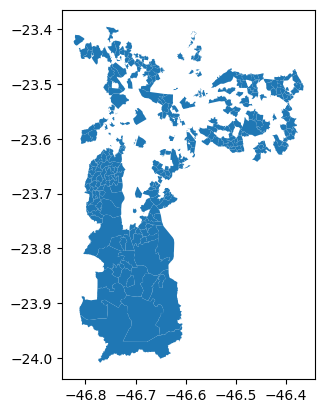

In [8]:
gdf.plot()

In [9]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
gdf = gdf.to_crs(epsg=31983)

In [11]:
gdf.crs

<Projected CRS: EPSG:31983>
Name: SIRGAS 2000 / UTM zone 23S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 48°W and 42°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-48.0, -33.5, -42.0, 5.13)
Coordinate Operation:
- name: UTM zone 23S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
distritos_geosampa = 'SIRGAS_SHP_distrito.zip'
with zipfile.ZipFile(distritos_geosampa, "r") as kmz:
    kmz.extractall()

In [13]:
dists = gpd.read_file('SIRGAS_SHP_distrito')

In [14]:
dists= dists.set_crs(epsg=31983)

<Axes: >

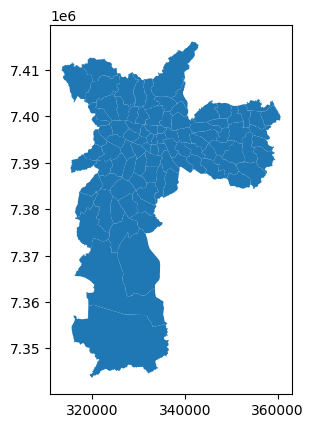

In [15]:
dists.plot()

In [16]:
mun = dists.dissolve()

<Axes: >

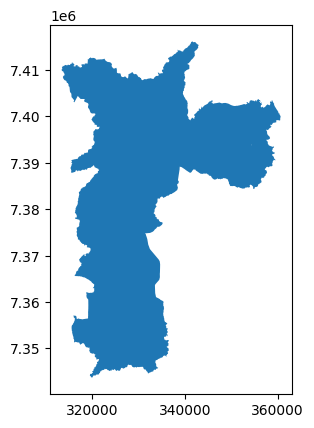

In [17]:
mun.plot()

In [18]:
area_mun = mun.area.values[0]

In [19]:
area_mun

1527221484.0327804

In [20]:
abrangencia_geral = gdf.dissolve()

<Axes: >

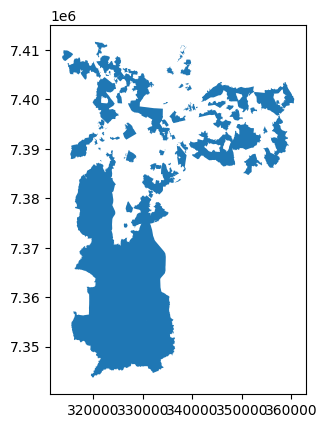

In [21]:
abrangencia_geral.plot()

In [22]:
area_abrangencia = abrangencia_geral.area.values[0]

In [23]:
percent_cobertura = area_abrangencia/area_mun

In [24]:
percent_cobertura

0.5802722597257435

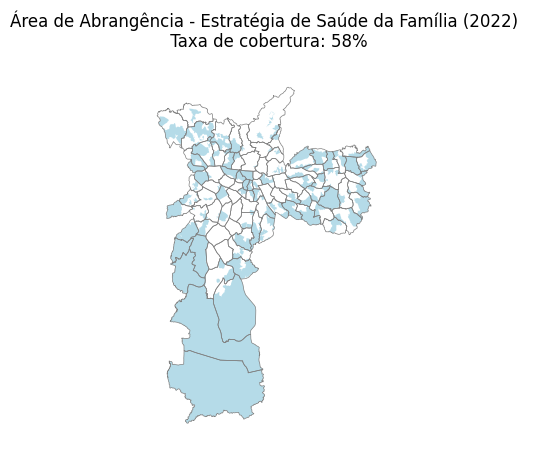

In [25]:
ax = dists.boundary.plot(color='grey', linewidth=0.5)
abrangencia_geral.plot(ax=ax, color='lightblue', alpha=0.9)
ax.set_title('Área de Abrangência - Estratégia de Saúde da Família (2022) \n Taxa de cobertura: 58%')
ax.set_axis_off()

In [26]:
fig = ax.get_figure()
fig.savefig('cobertura_saude_familia.png', bbox_inches='tight')